In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
dataMed= pd.read_csv('Medical_data.csv')

In [3]:
dataMed.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [5]:
dataMed.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
dataMed.shape

(1338, 7)

In [7]:
dataMed.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
dataMed.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
sex_label = {ni: n for n, ni in enumerate(set(dataMed["sex"]))}
smoker_label = {ni: n for n, ni in enumerate(set(dataMed["smoker"]))}
region_label = {ni: n for n, ni in enumerate(set(dataMed["region"]))}

In [10]:
sex_label

{'male': 0, 'female': 1}

In [11]:
print("sex_label = {}".format(sex_label))
print("smoker_label = {}".format(smoker_label))
print("region_label = {}".format(region_label))

sex_label = {'male': 0, 'female': 1}
smoker_label = {'no': 0, 'yes': 1}
region_label = {'southwest': 0, 'southeast': 1, 'northeast': 2, 'northwest': 3}


In [12]:
sex= sex_label
smoker = smoker_label
region = region_label

In [13]:
sex

{'male': 0, 'female': 1}

In [14]:
dataMed['sex']= dataMed['sex'].map(sex_label)
dataMed['smoker']= dataMed['smoker'].map(smoker_label)
dataMed['region']= dataMed['region'].map(region_label)

In [15]:
dataMed.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [16]:
dataMed.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

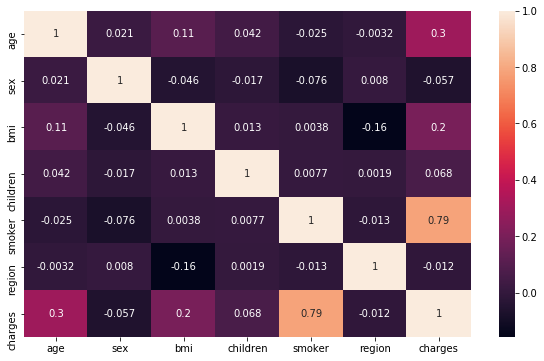

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(dataMed.corr(),annot=True)

In [18]:
dataMed.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.485052,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [19]:
dataMed.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
X  = dataMed[['age','sex', 'bmi', 'children', 'smoker', 'region']]
y = dataMed ['charges']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [22]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6946444840910138

In [23]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.79907548, 0.74807097, 0.71030271, 0.77393855, 0.81081274])

In [24]:
from sklearn.tree import DecisionTreeRegressor
dec = DecisionTreeRegressor()
dec.fit(X_train,y_train)
dec.score(X_test,y_test)

0.6253174665363903

In [25]:
#Using Lasso Regressor
la = Lasso()
la.fit(X_train,y_train)
la.score(X_test,y_test)

0.6946733001101146

In [26]:
#Saving model
import joblib

In [27]:
lin_Model = open("lin_med_model.pkl","wb")
joblib.dump(lr_clf,lin_Model)
lin_Model.close()

In [28]:
dec_Model = open("dec_med_model.pkl","wb")
joblib.dump(dec, dec_Model)
dec_Model.close()

In [29]:
la_Model = open("la_med_model.pkl","wb")
joblib.dump(la,la_Model)
la_Model.close()